# King County Housing Data
### A Breakdown of Leading Sale Price Variables

## Importing Our Modules and Inital Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels.api as sm
from scipy import stats
from geopy import distance
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

## Cleaning and Preparing our Data

**Removing Outliers in Our Data**

We noticed large outliers in our data through looking at the ".describe()" information outlied above.  We are opting to remove houses where the sale price is more than 3 standard deviations above our mean.  After we cleaned this column, we see that we have a healthier distribution in our 'price' column.  This will enable us to create a more effective predictive model of home prices in King County.

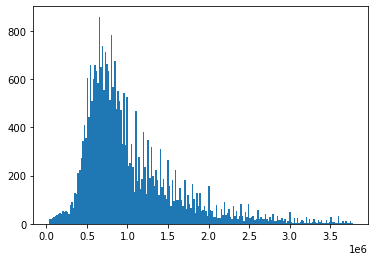

In [6]:
# Cleaning our data
df_sorted = df.sort_values(by='price', ascending=False)
df.drop(df[df['price'] >= 3797691].index, inplace = True)

# Plotting our data
plt.hist(df['price'], bins = 200)
plt.show()

**Creating New Columns for Categorical and Ordinal Data**

Below we are cleaning columns with categorical and ordinal data such that the values in these columns are either turned into dummy variables or assigned a value based on the ordinal data.

In [7]:
df['waterfront'].value_counts()

NO     29302
YES      416
Name: waterfront, dtype: int64

In [8]:
df['waterfront'].replace(['NO', 'YES'], [0,1], inplace = True)

In [9]:
df['greenbelt'].value_counts()

NO     28961
YES      757
Name: greenbelt, dtype: int64

In [10]:
df['greenbelt'].replace(['NO', 'YES'], [0, 1], inplace = True)

In [11]:
df['nuisance'].value_counts()

NO     24577
YES     5141
Name: nuisance, dtype: int64

In [12]:
df['nuisance'].replace(['NO', 'YES'], [0, 1], inplace = True)

In [13]:
df['view'].value_counts()

NONE         26395
AVERAGE       1849
GOOD           830
EXCELLENT      440
FAIR           204
Name: view, dtype: int64

In [14]:
df['view'].replace(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'], [0, 1, 2, 3, 4], inplace = True)

In [15]:
df['view'].value_counts()

0    26395
2     1849
3      830
4      440
1      204
Name: view, dtype: int64

In [16]:
df['condition'].value_counts()

Average      18225
Good          7971
Very Good     3228
Fair           230
Poor            64
Name: condition, dtype: int64

In [17]:
df['condition'].replace(['Poor', 'Fair', 'Average', 'Good', 'Very Good'], [1, 2, 3, 4, 5], inplace = True)

In [18]:
df['condition'].value_counts()

3    18225
4     7971
5     3228
2      230
1       64
Name: condition, dtype: int64

In [19]:
df['grade'].value_counts()

7 Average        11688
8 Good            9369
9 Better          3744
6 Low Average     2847
10 Very Good      1271
5 Fair             390
11 Excellent       282
12 Luxury           56
4 Low               50
3 Poor              13
13 Mansion           4
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [20]:
df['grade'].replace(['1 Cabin', '2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)

**Removing Addresses Not in King County**

In reviewing the addresses in our data, we noticed a number of addresses that fell outside of King County, Washington.  Below we are cleaning out this data.  

In [21]:
df = df[df['address'].str.contains('98001|98002|98003|98004|98005|98006|98007|98008|98009|98010|98011|98013|98014|98015|98019|98022|98023|98024|98025|98027|98028|98029|98030|98031|98032|98033|98034|98035|98038|98039|98040|98041|98042|98045|98047|98050|98051|98052|98053|98054|98055|98056|98057|98058|98059|98062|98063|98064|98065|98068|98070|98071|98072|98073|98074|98075|98077|98083|98092|98093|98101|98102|98103|98104|98105|98106|98107|98108|98109|98111|98112|98114|98115|98116|98117|98118|98119|98121|98122|98124|98125|98126|98131|98132|98133|98134|98136|98138|98144|98145|98146|98148|98154|98155|98158|98160|98161|98164|98166|98168|98171|98174|98177|98178|98188|98198|98199|98224|98288')]

**Creating a Column that Identifies Zip Code**

In [22]:
zip_ = []
for add in df['address']:
    zip_.append(add[-20:-15])

df['zip'] = zip_

**Creating Columns by Average Home Price by Zip Code**

This column will identify the median house sale price for a house's zip code. 

In [23]:
# Creating median home price by zip code
df['zip'] = df['zip'].astype(int)
zipdf = df.groupby('zip')['price'].median()
zipdf[98133]

# creating row in df for the median home price for the zip code
median_home_price = []

for zip_ in df['zip']:
    median_home_price.append(zipdf[zip_])

df['median_home_price'] = median_home_price

In [24]:
df_grouped = df.groupby('zip')['price'].mean().reset_index()

# Calculate quartiles for prices
quartiles = pd.qcut(df_grouped['price'], q=[0, 0.25, 0.75, 1], labels=['Lower 25%', 'Middle 50%', 'Top 75%'])

# Add the quartile column to the grouped DataFrame
df_grouped['quartile'] = quartiles

In [25]:
numbers_to_search = [98001, 98002, 98003, 98022, 98023, 98030, 98031, 98032, 98042, 98047, 98057, 98106, 98148, 98168, 98178, 98188, 98198, 98224, 98288]

# Create a new column "x" based on the presence of the numbers
df['lower_25_zip'] = df['zip'].isin(numbers_to_search).astype(int)
df['lower_25_zip']

numbers_to_search = [98007, 98010, 98011, 98014, 98019, 98024, 98027, 98028, 98034, 98038, 98045, 98051, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98092, 98103, 98105, 98107, 98108, 98115, 98116, 98117, 98118, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98155, 98166, 98177]
df['middle_50_zip'] = df['zip'].isin(numbers_to_search).astype(int)

numbers_to_search = [98004, 98005, 98006, 98008, 98029, 98033, 98039, 98040, 98050, 98052, 98053, 98074, 98075, 98077, 98102, 98109, 98112, 98119, 98199]
df['top_75_zip'] = df['zip'].isin(numbers_to_search).astype(int)

**Creating Column for "Year"**

Below we are creating a column for the year that a house was sold to see that relation to sale price.

In [26]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year.astype(str).str[:4]
df['year'] = df['year'].astype(int)

**Creating Columns for Distance**

Below we are creating columns that account for a house's distance from certain locations.  We researched up and coming areas of Seattle and mapped out the distance of houses from these areas.  Additionally, we created a column for the distance from the Seattle central business district.

In [27]:
def distance_from(lat, long, series_lat, series_long):
    '''
    Creates a list with distances from the coordinate given by
    the first two arguments, to the coordinate given by the two
    second arguments.
    '''
    lat_long = series_lat.astype(str) + ',' + series_long.astype(str)
    lat_long = list(map(eval, lat_long))
    coordinates = (lat, long)
    miles = []
    for i in lat_long:
        miles.append(round(distance.distance(i, coordinates).miles, 1))
    return miles

In [28]:
df['distance_seattle'] = distance_from(47.6097, -122.3331, df['lat'], df['long'])
df['distance_bellvue'] = distance_from(47.6101, -122.2015, df['lat'], df['long'])
df['distance_kent'] = distance_from(47.3809, -122.2348, df['lat'], df['long'])
df['distance_federal_way'] = distance_from(47.3165, -122.3222, df['lat'], df['long'])
df['distance_bothell'] = distance_from(47.7601, -122.2054, df['lat'], df['long'])
df['distance_burien'] = distance_from(47.4704, -122.3468, df['lat'], df['long'])
df['distance_auburn'] = distance_from(47.3073, -122.2285, df['lat'], df['long'])
df['distance_renton'] = distance_from(47.4829, -122.2171, df['lat'], df['long'])
df['distance_redmond'] = distance_from(47.6740, -122.1215, df['lat'], df['long'])
df['distance_sammamish'] = distance_from(47.6114, -122.0357, df['lat'], df['long'])
df['distance_kirkland'] = distance_from(47.6777, -122.2060, df['lat'], df['long'])
df['distance_shoreline'] = distance_from(47.7565, -122.3422, df['lat'], df['long'])

**Adding Income and Population Data**

Below we are adding in information on median income and total population by zip code.  We sourced this data through the US Census Bureau via "Point2Homes.com"

*Source: https://www.point2homes.com/US/Neighborhood/WA/King-County-Demographics.html*

In [29]:
df2 = pd.read_csv('data/King County Pop Income Info.csv')
# Assign row as column headers
header_row = 0
df2.columns = df2.iloc[header_row]

# Convert row to column header using DataFrame.iloc[]
df2.columns = df2.iloc[0]

# Dropping first row
df2 = df2.iloc[1:]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 1 to 83
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nan                   0 non-null      float64
 1   ZipCode               83 non-null     object 
 2   Population            83 non-null     object 
 3   Number of Households  83 non-null     object 
 4   Median Income         83 non-null     object 
 5   Average Income        83 non-null     object 
 6   nan                   0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 4.7+ KB


In [30]:
df2 = df2.set_index('ZipCode')
df2['Median Income'] = df2['Median Income'].str.replace(',', '')
df2['Median Income'] = df2['Median Income'].str.replace('$', '')
df2['Median Income'] = df2['Median Income'].astype(float)
df2 = df2.dropna(axis=1)

# creating an index list from df2 that contains list of zip codes in our data
index_list = df2.index.values.tolist()

In [31]:
# creating row in df for the median income for the zip code - this is to see if the median income affects price
median_inc = []

for zip_ in df['zip']:
    y = str(zip_)
    if y in index_list:
        x = df2.loc[y]
        median_inc.append(x['Median Income'])
    else:
        median_inc.append('NaN')

df['median_zip_income'] = median_inc
df['median_zip_income'] = df['median_zip_income'].astype(float)

In [32]:
# creating column in df for population by zip code - this is to see if the population of a zip code affects price
zip_pop = []

for zip_ in df['zip']:
    y = str(zip_)
    if y in index_list:
        x = df2.loc[y]
        zip_pop.append(x['Population'])
    else:
        zip_pop.append('NaN')

df['zip_population'] = zip_pop
df['zip_population'] = df['zip_population'].str.replace(',', '')
df['zip_population'] = df['zip_population'].astype(float)
df = df.dropna(axis=0)

**Creating Interaction Columns**

Below we are creating columns for variables that have similar affects on price based on the heatmap below.

In [33]:
df['sqft_living_x_above'] = df['sqft_living']*df['sqft_above']
# Creating median home price by zip code
zipdf = df.groupby('zip')['price'].median()
median_home_price = []

for zip_ in df['zip']:
    median_home_price.append(zipdf[zip_])

df['median_home_price'] = median_home_price
df['grade_x_price'] = df['grade'] * df['median_home_price']

In [34]:
df['sqft_living_grade'] = df['sqft_living'] * df['grade']
df['sqft_bath'] = df['sqft_living'] * df['bathrooms']

**Creating Column for Proximity to Whole Foods**

As we know Whole Foods Market is an indicator of the social status of certain neighborhoods, we are creating a column indicating if a house's zip code has a Whole Foods Market to see if this has an affect on home prices.

In [35]:
df['zip'] = df['zip'].astype(str)
zips_with_whole_foods = ['98116', '98122', '98119', '98121', '98115', '98034', '98004', '98052']
df['zip_has_wh'] = np.where(df['zip'].str.contains('98116|98122|98119|98121|98115|98034|98004|98052'), 1, 0)

## Exploring our Correlations

Now that we have cleaned our data, we are going to start exploring correlations that our various variables has with 'price'.  The goal of this exercise is to find variables that are highly correlated with price such that we can use these variables in a regression model to predict sale prices in King County.

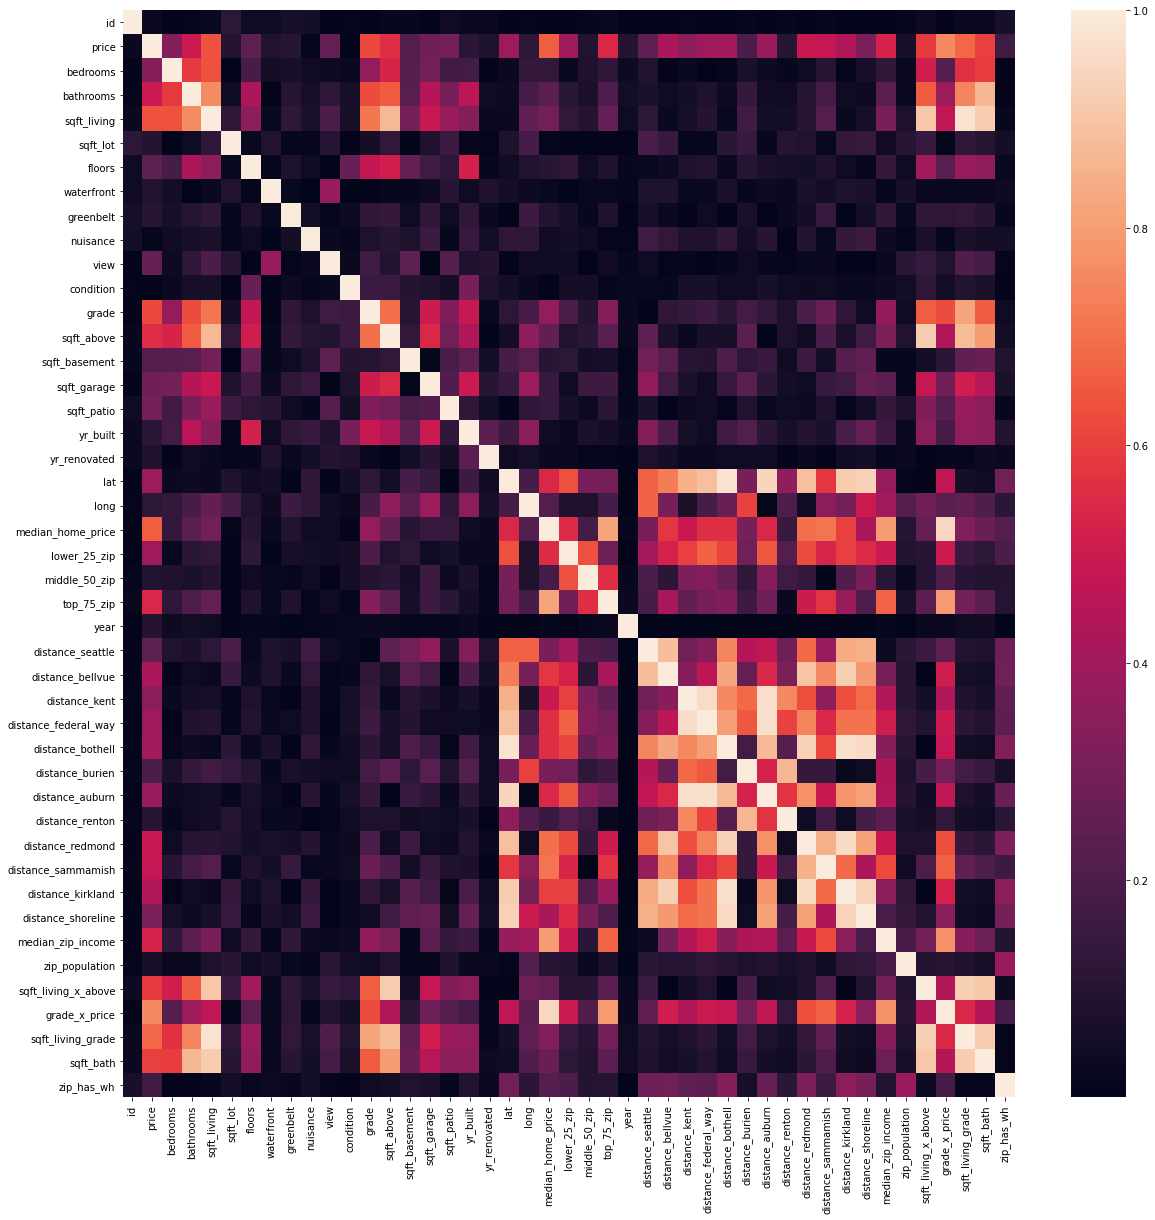

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs())
plt.show()

**MODEL 1 - Square Feet Living Variable**

The first variable we are exploring is the 'sqft_living' variable as this variable has a high correlation with 'price.

In [37]:
X = df['sqft_living']
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                 1.966e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        14:49:58   Log-Likelihood:            -4.1550e+05
No. Observations:               28723   AIC:                         8.310e+05
Df Residuals:                   28721   BIC:                         8.310e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.536e+05   6914.061     22.222      0.000     1.4e+05    1.67e+05
sqft_living   425.4279      3.034    140.225      0.000     419.481     431.374
==============================================================================
Omnibus:                     5894.097   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18291.141
Skew:                           1.055   Prob(JB):                         0.00
Kurtosis:                       6.291   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Mean Absolute Error**

Below we are calculating the Mean Absolute error. We will compare this error to the mean absolute error of future models.

In [38]:
from sklearn.metrics import mean_absolute_error as mae
y_pred = model.predict(sm.add_constant(X))
mae(y, y_pred)

338783.45035597915

**MODEL 2 - Adding More Variables to Our Model**

Below we are adding additional, price-correlated variables into our model.

In [39]:
X = df[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'sqft_above']]
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     5019.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        14:50:01   Log-Likelihood:            -4.1397e+05
No. Observations:               28723   AIC:                         8.280e+05
Df Residuals:                   28717   BIC:                         8.280e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.264e+05   2.33e+04    -35.536      0.000   -8.72e+05   -7.81e+05
sqft_living   352.8460      7.312     48.254      0.000     338.514     367.178
grade        1.869e+05   3587.243     52.104      0.000     1.8e+05    1.94e+05
bathrooms   -1.234e+04   4905.816     -2.514      0.012    -2.2e+04   -2719.461
bedrooms    -4.124e+04   3625.146    -11.375      0.000   -4.83e+04   -3.41e+04
sqft_above    -66.3446      6.570    -10.098      0.000     -79.223     -53.466
==============================================================================
Omnibus:                     6302.169   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21902.047
Skew:                           1.089   Prob(JB):                         0.00
Kurtosis:                       6.682   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Mean Absolute Error**

We see a decreasing mean absolute error with this model below.

In [40]:
from sklearn.metrics import mean_absolute_error as mae
y_pred = model.predict(sm.add_constant(X))
mae(y, y_pred)

320281.3860160106

**MODEL 3 - Adding External and Feature Engineered Variables**

Below we are adding additional, price-correlated variables into our model.  These variables are either from our external data sources or feature engineered through interactions.

In [41]:
X = df[['sqft_living', 'grade', 'sqft_living_grade', 'yr_renovated', 'sqft_above', 'sqft_basement', 'condition', 
        'floors', 'lower_25_zip', 'middle_50_zip', 'top_75_zip', 'waterfront', 'view', 'year', 'distance_bellvue', 
        'distance_bothell', 'distance_renton', 'distance_redmond', 'distance_kirkland', 'distance_shoreline', 
        'sqft_bath', 'sqft_living_x_above', 'zip_population', 'zip_has_wh', 'median_home_price', 'grade_x_price']]
y = df['price']

In [42]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     3769.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        14:50:06   Log-Likelihood:            -4.0210e+05
No. Observations:               28723   AIC:                         8.043e+05
Df Residuals:                   28697   BIC:                         8.045e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.425e+08   5.43e+06    -44.653      0.000   -2.53e+08   -2.32e+08
sqft_living          -249.3482     15.732    -15.850      0.000    -280.183    -218.513
grade               -1.173e+05   5600.755    -20.942      0.000   -1.28e+05   -1.06e+05
sqft_living_grade      53.0193      1.984     26.723      0.000      49.130      56.908
yr_renovated           50.2692      4.205     11.954      0.000      42.027      58.512
sqft_above            285.4828      9.817     29.081      0.000     266.242     304.724
sqft_basement          23.6968      6.011      3.942      0.000      11.915      35.479
condition            6.355e+04   2577.130     24.661      0.000    5.85e+04    6.86e+04
floors              -5.862e+04   4379.035    -13.387      0.000   -6.72e+04      -5e+04
lower_25_zip        -8.085e+07   1.81e+06    -44.655      0.000   -8.44e+07   -7.73e+07
middle_50_zip       -8.084e+07   1.81e+06    -44.652      0.000   -8.44e+07   -7.73e+07
top_75_zip          -8.083e+07   1.81e+06    -44.651      0.000   -8.44e+07   -7.73e+07
waterfront           3.053e+05   1.59e+04     19.160      0.000    2.74e+05    3.37e+05
view                 7.368e+04   2414.825     30.512      0.000    6.89e+04    7.84e+04
year                 1.602e+05   3582.412     44.718      0.000    1.53e+05    1.67e+05
distance_bellvue    -3.032e+04   3033.786     -9.995      0.000   -3.63e+04   -2.44e+04
distance_bothell     3.753e+04   2550.254     14.717      0.000    3.25e+04    4.25e+04
distance_renton      3.026e+04   1143.631     26.462      0.000     2.8e+04    3.25e+04
distance_redmond     2.843e+04   2229.498     12.752      0.000    2.41e+04    3.28e+04
distance_kirkland   -7.474e+04   3662.745    -20.406      0.000   -8.19e+04   -6.76e+04
distance_shoreline   6690.7756   1505.809      4.443      0.000    3739.320    9642.231
sqft_bath              13.6936      1.229     11.146      0.000      11.285      16.102
sqft_living_x_above    -0.0441      0.002    -22.417      0.000      -0.048      -0.040
zip_population         -0.6112      0.155     -3.935      0.000      -0.916      -0.307
zip_has_wh           2.222e+04   6627.248      3.353      0.001    9233.734    3.52e+04
median_home_price      -0.2664      0.038     -7.067      0.000      -0.340      -0.192
grade_x_price           0.0888      0.004     20.302      0.000       0.080       0.097
==============================================================================
Omnibus:                     7017.773   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161731.141
Skew:                           0.630   Prob(JB):                         0.00
Kurtosis:                      14.556   Cond. No.                     2.60e+15
================================================

**Mean Absolute Error**

Within our final model, we see a mean absolute error of $187,397, which shows a lot of progress from our earlier models with limited variables.

In [43]:
from sklearn.metrics import mean_absolute_error as mae
y_pred = model.predict(sm.add_constant(X))
mae(y, y_pred)

187397.75554157808

In [45]:
df.to_csv('data/cleaned_data.csv')